# Projeto Integrado
### Quantum Finance
 Conforme analisado nas disciplinas anteriores, você possui acesso aos dados de clientes da Quantum Finance, composto por mais de uma centena de variáveis independentes. A esta altura você já tem uma percepção da importância de cada um delas.

 Partindo deste ponto, realize:

 1A) Apresente uma análise descritiva (EDA) dos dados, não esqueça de trazer as conclusões de negócio 1B) Realize a limpeza dos dados, e revise sua EDA.

 2A) Entenda que tipo de análise preditiva você quer realizar, se classificação ou regressão, e qual algoritmo lhe traz o melhor resultado. Caso necessário realize um trabalho de feature engineering.

 2B) Realize um exercício para prever/inferir esta com base em combinação de variáveis diferentes. Experimente também com diversos tipos de algoritmos. Para todos eles, mensure a assertividade tanto nos dados de treino quanto de teste. Discorra sobre esses resultados. Não esqueça de realizar a separação dos dados em treino e teste.

In [1]:
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
dados = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/QuantumF/main/credit%20-%20ok.csv', sep=',')

#Legenda das variáveis dependentes

**ID**
Representa uma identificação única de uma entrada.

**Customer_ID**
Representa uma identificação única de uma pessoa.

**Month**
Representa o mês do ano.

**Name**
Representa o nome de uma pessoa.

**Age**
Representa a idade da pessoa.

**SSN**
Representa o número de seguridade social de uma pessoa.

**Occupation**
Representa a ocupação da pessoa.

**Annual_Income**
Representa a renda anual da pessoa.

**Monthly_Inhand_Salary**
Representa o salário base mensal da pessoa.

**Num_Bank_Accounts**
Representa o número de contas bancárias que uma pessoa possui.

**Num_Credit_Card**
Representa o número de outros cartões de crédito que uma pessoa possui.

**Interest_Rate**
Representa a taxa de juros no cartão de crédito.

**Num_of_Loan**
Representa o número de empréstimos tomados no banco.

**Type_of_Loan**
Representa os tipos de empréstimo tomados por uma pessoa.

**Delay_from_due_date**
Representa a média de dias de atraso a partir da data de vencimento do pagamento.

**Num_of_Delayed_Payment**
Representa a média de pagamentos atrasados por uma pessoa.

**Changed_Credit_Limit**
Representa a porcentagem de alteração no limite do cartão de crédito.

**Num_Credit_Inquiries**
Representa o número de consultas sobre o cartão de crédito.

**Credit_Mix**
Representa a classificação da combinação de créditos.

**Outstanding_Debt**
Representa a dívida pendente a ser paga (em USD).

**Credit_Utilization_Ratio**
Representa a razão de utilização do cartão de crédito.

**Credit_History_Age**
Representa a idade do histórico de crédito da pessoa.

**Payment_of_Min_Amount**
Representa se apenas o valor mínimo foi pago pela pessoa.

**Total_EMI_per_month**
Representa os pagamentos mensais de EMI (em USD).

**Amount_invested_monthly**
Representa o valor mensal investido pelo cliente (em USD).

**Payment_Behaviour**
Representa o comportamento de pagamento do cliente (em USD).

**Monthly_Balance**
Representa o saldo mensal do cliente (em USD).

#Legenda da variável independente

**Credit_Score**
Representa a pontuação do cliente, em forma de classificação.


In [50]:
pd.set_option('display.max_columns', None)
print(dados.head())

       ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0      19114.12            1824.843333                  3                4   
1      19114.12                    NaN                  3                4   
2      19114.12                    NaN                  3                4   
3      19114.12                    NaN                  3                4   
4      19114.12            1824.843333                  3                4   

   Interest_Rate Num_of_Loan  \
0              3  

In [51]:
dados.shape

(83144, 28)

# Análise descritiva (EDA)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83144 entries, 0 to 83143
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        83144 non-null  object 
 1   Customer_ID               83144 non-null  object 
 2   Month                     83144 non-null  object 
 3   Name                      74822 non-null  object 
 4   Age                       83144 non-null  object 
 5   SSN                       83144 non-null  object 
 6   Occupation                83144 non-null  object 
 7   Annual_Income             83144 non-null  object 
 8   Monthly_Inhand_Salary     70703 non-null  float64
 9   Num_Bank_Accounts         83144 non-null  int64  
 10  Num_Credit_Card           83144 non-null  int64  
 11  Interest_Rate             83144 non-null  int64  
 12  Num_of_Loan               83144 non-null  object 
 13  Type_of_Loan              73622 non-null  object 
 14  Delay_

**Número total de registros: 83.144**

### Colunas com valores ausentes:

Name (7.322 ausentes);

Monthly_Inhand_Salary (12.441 ausentes);

Type_of_Loan (9.522 ausentes);

Num_of_Delayed_Payment (5.805 ausentes);

Credit_History_Age (7.485 ausentes);

Amount_invested_monthly (5.689 ausentes);

Num_Credit_Inquiries (1.616 ausentes);

Monthly_Balance (1.019 ausentes);


### Tipos de dados:

Variáveis como Age, Annual_Income, Num_of_Loan, Outstanding_Debt, Num_of_Delayed_Payment, e Changed_Credit_Limit estão como object, mas deveriam ser numéricas.

In [6]:
dados.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,70703.000000,83144.000000,83144.000000,83144.000000,83144.000000,81528.000000,83144.000000,83144.000000
mean,4193.869821,16.924059,22.301309,73.209191,21.050382,27.681594,32.298935,1380.861140
std,3187.081513,116.875468,128.481073,470.881900,14.841171,192.442884,5.116523,8243.094161
min,319.556250,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1629.773333,3.000000,4.000000,8.000000,10.000000,3.000000,28.063496,30.403233
50%,3081.977500,6.000000,6.000000,13.000000,18.000000,6.000000,32.333159,68.966090
75%,5947.320000,7.000000,7.000000,20.000000,28.000000,9.000000,36.517910,160.321434
max,15204.633330,1798.000000,1499.000000,5789.000000,67.000000,2597.000000,50.000000,82331.000000


#Limpeza dos dados

### Criando uma cópia do DF

In [7]:
dados_limpos = dados.copy()

###Convertendo as colunas que estão em string para númericas.

In [8]:
# Converter colunas numéricas representadas como strings para o tipo numérico
dados_limpos['Annual_Income'] = pd.to_numeric(dados_limpos['Annual_Income'], errors='coerce')
dados_limpos['Num_of_Loan'] = pd.to_numeric(dados_limpos['Num_of_Loan'], errors='coerce')
dados_limpos['Outstanding_Debt'] = pd.to_numeric(dados_limpos['Outstanding_Debt'], errors='coerce')
dados_limpos['Num_of_Delayed_Payment'] = pd.to_numeric(dados_limpos['Num_of_Delayed_Payment'], errors='coerce')
dados_limpos['Changed_Credit_Limit'] = pd.to_numeric(dados_limpos['Changed_Credit_Limit'].replace('_', np.nan), errors='coerce')
dados_limpos['Monthly_Balance'] = pd.to_numeric(dados_limpos['Monthly_Balance'], errors='coerce')


###Tratando valores nulos.

In [9]:
# Substituir valores nulos nas colunas numéricas com a mediana
dados_limpos['Monthly_Inhand_Salary'].fillna(dados_limpos['Monthly_Inhand_Salary'].median(), inplace=True)
dados_limpos['Num_Credit_Inquiries'].fillna(dados_limpos['Num_Credit_Inquiries'].median(), inplace=True)
dados_limpos['Num_of_Delayed_Payment'].fillna(dados_limpos['Num_of_Delayed_Payment'].median(), inplace=True)


<ipython-input-9-e8f0f1bca66b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_limpos['Monthly_Inhand_Salary'].fillna(dados_limpos['Monthly_Inhand_Salary'].median(), inplace=True)
<ipython-input-9-e8f0f1bca66b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [10]:
# Limpando a variavel 'Amount_invested_monthly' antes de calcular a mediana.
dados_limpos['Amount_invested_monthly'] = dados_limpos['Amount_invested_monthly'].str.replace(',', '', regex=True).str.replace(' ', '', regex=True) #remove espaços em branco.
dados_limpos['Amount_invested_monthly'] = pd.to_numeric(dados_limpos['Amount_invested_monthly'], errors='coerce')


# Substituir valores nulos nas colunas numéricas com a mediana
dados_limpos['Amount_invested_monthly'].fillna(dados_limpos['Amount_invested_monthly'].median(), inplace=True)


# Substituir valores nulos em colunas categóricas
dados_limpos['Type_of_Loan'].fillna('Não informado', inplace=True)
dados_limpos['Credit_History_Age'].fillna('Não informado', inplace=True)
dados_limpos['Amount_invested_monthly'].fillna(dados_limpos['Amount_invested_monthly'].median(), inplace=True)
dados_limpos['Monthly_Balance'].fillna(dados_limpos['Monthly_Balance'].median(), inplace=True)


<ipython-input-10-294ddcfb3b8b>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_limpos['Amount_invested_monthly'].fillna(dados_limpos['Amount_invested_monthly'].median(), inplace=True)
<ipython-input-10-294ddcfb3b8b>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

### Tratamento de valores NaN e valores divergentes/errados.

In [11]:

# Corrigir valores inválidos na coluna 'Age'
dados_limpos['Age'] = pd.to_numeric(dados_limpos['Age'], errors='coerce')  # Convertendo para numérico e transformando valores inválidos em NaN
dados_limpos['Age'] = dados_limpos['Age'].replace({-500: np.nan})  # Remover valor anômalo de -500
dados_limpos['Age'].fillna(dados_limpos['Age'].median(), inplace=True)  # Substituir NaN pela mediana

# Corrigir valores de 'Credit_Mix', substituindo "_" por "Unknown"
dados_limpos['Credit_Mix'] = dados_limpos['Credit_Mix'].replace('_', 'Unknown')

# Remover duplicatas, se existirem
dados_limpos.drop_duplicates(inplace=True)


<ipython-input-11-afeb5e384d7a>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_limpos['Age'].fillna(dados_limpos['Age'].median(), inplace=True)  # Substituir NaN pela mediana


In [12]:
# Substituir valores nulos ou inválidos nas colunas numéricas convertidas
dados_limpos['Annual_Income'].fillna(dados_limpos['Annual_Income'].median(), inplace=True)
dados_limpos['Num_of_Loan'].fillna(dados_limpos['Num_of_Loan'].median(), inplace=True)
dados_limpos['Outstanding_Debt'].fillna(dados_limpos['Outstanding_Debt'].median(), inplace=True)
dados_limpos['Changed_Credit_Limit'].fillna(dados_limpos['Changed_Credit_Limit'].median(), inplace=True)

# Verificar se ainda há valores nulos
print(dados_limpos.isnull().sum())


ID                             0
Customer_ID                    0
Month                          0
Name                        8322
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age             0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64


<ipython-input-12-3313cdc4b29c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_limpos['Annual_Income'].fillna(dados_limpos['Annual_Income'].median(), inplace=True)
<ipython-input-12-3313cdc4b29c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

### Convertendo as variáveis temporais.

Vamos converter as variáveis temporais para categóricas.

In [13]:
# Converter a variável 'Month' para números
dados_limpos['Month_Num'] = dados_limpos['Month'].map({
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
})

# Converter 'Credit_History_Age' em número de meses
dados_limpos['Credit_History_Age_Months'] = dados_limpos['Credit_History_Age'].str.extract('(\d+)').astype(float)



In [14]:
dados_limpos = dados_limpos.drop(['Month', 'Credit_History_Age'], axis=1)

In [15]:
dados_limpos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83144 entries, 0 to 83143
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         83144 non-null  object 
 1   Customer_ID                83144 non-null  object 
 2   Name                       74822 non-null  object 
 3   Age                        83144 non-null  float64
 4   SSN                        83144 non-null  object 
 5   Occupation                 83144 non-null  object 
 6   Annual_Income              83144 non-null  float64
 7   Monthly_Inhand_Salary      83144 non-null  float64
 8   Num_Bank_Accounts          83144 non-null  int64  
 9   Num_Credit_Card            83144 non-null  int64  
 10  Interest_Rate              83144 non-null  int64  
 11  Num_of_Loan                83144 non-null  float64
 12  Type_of_Loan               83144 non-null  object 
 13  Delay_from_due_date        83144 non-null  int

In [16]:
# Tratamento de outliers na coluna 'Interest_Rate'
interest_rate_outliers = dados_limpos[dados_limpos['Interest_Rate'] > 30].index
dados_limpos.drop(interest_rate_outliers, inplace=True)



### Retirando colunas de identificação.

Vamos remover as colunas de identificação.


In [17]:
dados_limpos = dados_limpos.drop(['ID', 'Customer_ID', 'Name', 'SSN'], axis=1)

### Criando uma função para gerar uma nova váriavel de Credit_Score em formato númerico de 0 à 1000.

In [18]:
import numpy as np

# Função para mapear o Credit_Score para valores numéricos
def converter_credit_score(score):
    if score == 'Poor':
        return np.random.randint(0, 300)  # Intervalo para Poor
    elif score == 'Standard':
        return np.random.randint(300, 500)  # Intervalo para Standard
    elif score == 'Good':
        return np.random.randint(500, 700)  # Intervalo para Good
    elif score == 'Very Good':
        return np.random.randint(700, 850)  # Intervalo para Very Good
    elif score == 'Excellent':
        return np.random.randint(850, 1000)  # Intervalo para Excellent
    else:
        return np.nan  # Para valores nulos ou inválidos

# Aplicar a função à coluna 'Credit_Score'
dados_limpos['Credit_Score_Numerico'] = dados_limpos['Credit_Score'].apply(converter_credit_score)

# Exibir os primeiros registros para conferir
dados_limpos[['Credit_Score', 'Credit_Score_Numerico']].head()


,Credit_Score,Credit_Score_Numerico
0,Good,696
1,Good,633
2,Good,591
3,Good,560
4,Good,667


In [19]:
# Verificar valores ausentes na nova coluna numérica
print(dados_limpos['Credit_Score_Numerico'].isnull().sum())

# Preencher valores ausentes com a média ou mediana
dados_limpos['Credit_Score_Numerico'].fillna(dados_limpos['Credit_Score_Numerico'].mean(), inplace=True)

0


<ipython-input-19-75a1df124551>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_limpos['Credit_Score_Numerico'].fillna(dados_limpos['Credit_Score_Numerico'].mean(), inplace=True)


#Tratando Outliers.

Vamos tratar os outliers usando o metódo IQR.

In [20]:
## tirando outliers de renda.

Q1 = dados_limpos['Annual_Income'].quantile(0.25)
Q3 = dados_limpos['Annual_Income'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Identificar outliers
outliers = dados_limpos[(dados_limpos['Annual_Income'] < lower_bound) | (dados_limpos['Annual_Income'] > upper_bound)]

# Remover outliers do DataFrame
df_cleaned = dados_limpos[(dados_limpos['Annual_Income'] >= lower_bound) & (dados_limpos['Annual_Income'] <= upper_bound)]

print(f'Número de outliers identificados: {len(outliers)}')
print(f'Número de entradas após remoção de outliers: {len(df_cleaned)}')

## aplicando os valores sem outliers em nossos dados_limpos

dados_sem_outliers = df_cleaned

Número de outliers identificados: 2300
Número de entradas após remoção de outliers: 74053


In [21]:
## tirando outliers de número de emprestimos

Q1 = dados_limpos['Num_of_Loan'].quantile(0.25)
Q3 = dados_limpos['Num_of_Loan'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Identificar outliers
outliers = dados_limpos[(dados_limpos['Num_of_Loan'] < lower_bound) | (dados_limpos['Num_of_Loan'] > upper_bound)]

# Remover outliers do DataFrame
df_cleaned = dados_limpos[(dados_limpos['Num_of_Loan'] >= lower_bound) & (dados_limpos['Num_of_Loan'] <= upper_bound)]

print(f'Número de outliers identificados: {len(outliers)}')
print(f'Número de entradas após remoção de outliers: {len(df_cleaned)}')

## aplicando os valores sem outliers em nossos dados_limpos

dados_sem_outliers = df_cleaned

Número de outliers identificados: 3264
Número de entradas após remoção de outliers: 73089


In [22]:
# Aplicando a função e verificando a quantidade de registros sem outliers.
# dados_sem_outliers = remover_outliers_iqr(dados_limpos)

print(f"Dados sem outliers usando IQR: {dados_sem_outliers.shape}")

Dados sem outliers usando IQR: (73089, 25)


# Separando as variáveis em Númericas e Categóricas

Variáveis Categóricas: Occupation, Type_of_Loan, Credit_Mix,Payment_of_Min_Amount, Payment_Behaviour, Credit_Score

Variáveis númericas:  Age,  Annual_Income,  Monthly_Inhand_Salary,  Num_Bank_Accounts,  Num_Credit_Card, Interest_Rate, Num_of_Loa, Delay_from_due_date, Num_of_Delayed_Payment, Changed_Credit_Limit,  Num_Credit_Inquiries, Outstanding_Debt, Credit_Utilization_Ratio, Total_EMI_per_month, Amount_invested_monthly, Monthly_Balance


In [23]:
dados_numericos = dados_sem_outliers.drop(['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Month_Num', 'Credit_History_Age_Months', 'Credit_Score' ], axis=1)
dados_categoricos = dados_sem_outliers[['Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Month_Num', 'Credit_History_Age_Months', 'Credit_Score' ]]

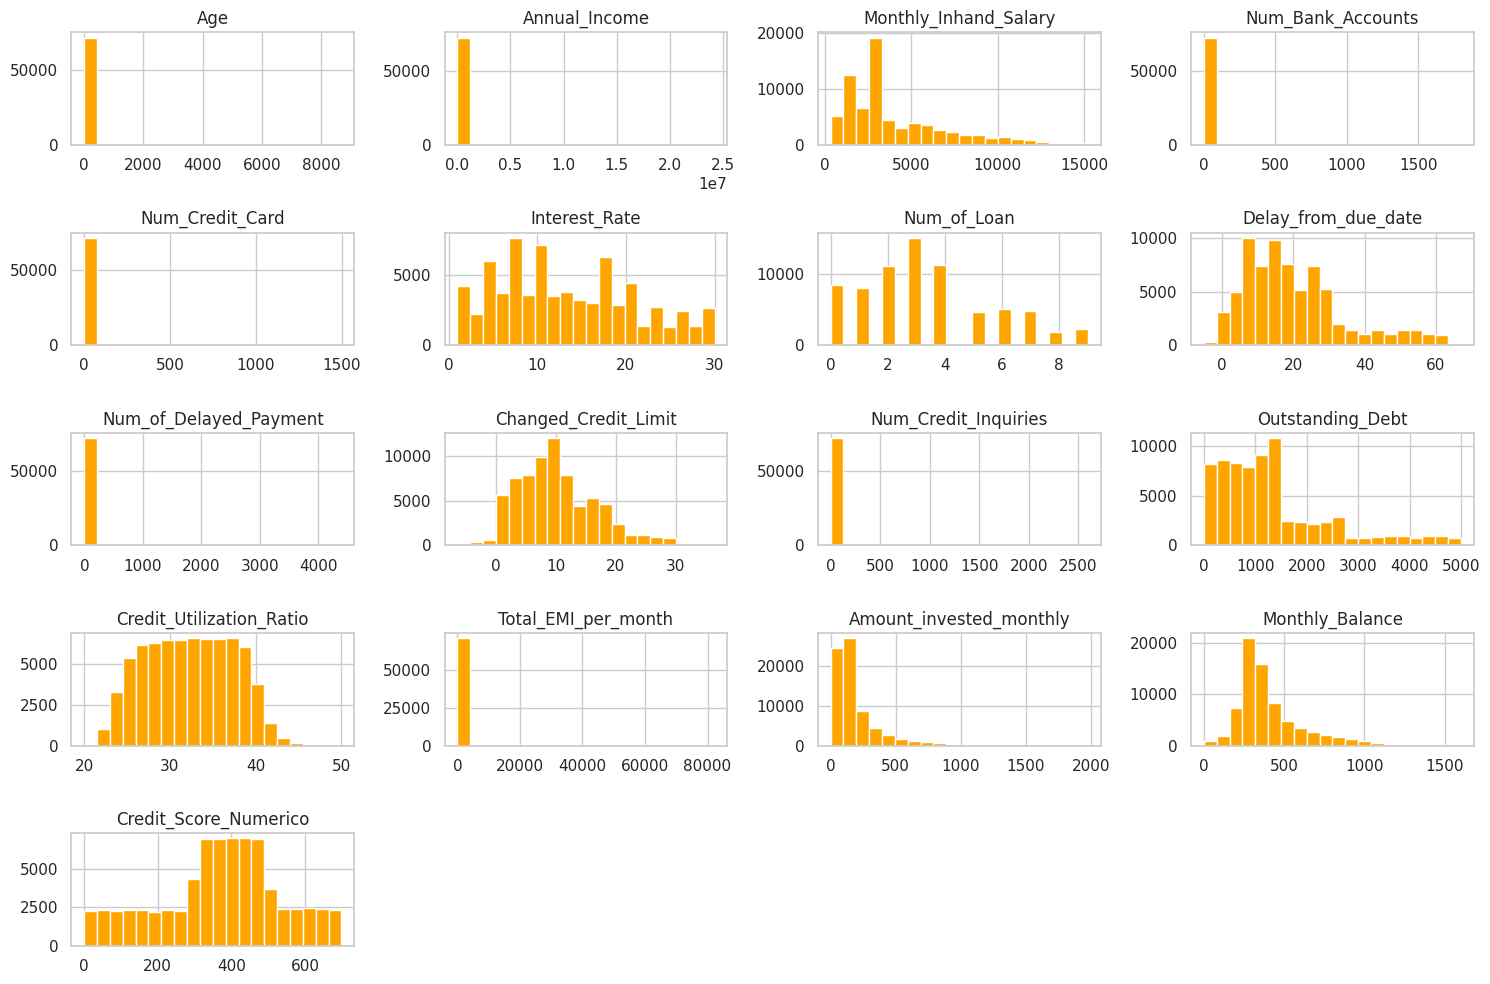

In [24]:
# Definir o estilo dos gráficos
sns.set(style="whitegrid")
cor_hist = 'orange'

# Plotar histogramas das variáveis numéricas
dados_numericos.hist(figsize=(15, 10), bins=20, color=cor_hist)
plt.tight_layout()
plt.show()

In [25]:
dados_numericos.describe()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score_Numerico
count,73089.000000,7.308900e+04,73089.000000,73089.000000,73089.000000,73089.000000,73089.000000,73089.000000,73089.000000,73089.000000,73089.000000,73089.000000,73089.000000,73089.000000,73089.000000,73089.000000,73089.000000
mean,111.908139,1.703600e+05,4108.415950,16.721996,22.255291,13.323058,3.358303,20.065181,28.734351,10.141614,27.241391,1336.642246,32.338656,1377.614451,193.592728,408.555820,370.069887
std,668.535935,1.398140e+06,3015.269029,116.471502,128.726495,7.646182,2.324513,14.257477,211.553398,6.572701,191.642260,1104.978737,5.121092,8217.427235,196.491942,216.280227,166.824621
min,14.000000,7.005930e+03,319.556250,-1.000000,0.000000,1.000000,0.000000,-5.000000,-3.000000,-6.490000,0.000000,0.540000,20.000000,0.000000,0.000000,0.088628,0.000000
25%,25.000000,2.048890e+04,1861.118333,3.000000,4.000000,7.000000,2.000000,9.000000,9.000000,5.300000,3.000000,541.540000,28.106207,29.054273,78.437855,274.146755,280.000000
50%,33.000000,3.742409e+04,3081.977500,5.000000,5.000000,12.000000,3.000000,17.000000,14.000000,9.390000,5.000000,1101.710000,32.360442,67.787338,129.158320,339.987888,385.000000
75%,42.000000,7.162520e+04,5538.650000,7.000000,7.000000,19.000000,5.000000,27.000000,17.000000,14.170000,8.000000,1685.800000,36.561142,157.781813,224.568019,477.232258,477.000000
max,8674.000000,2.419806e+07,15204.633330,1798.000000,1499.000000,30.000000,9.000000,67.000000,4397.000000,36.490000,2597.000000,4997.100000,50.000000,82256.000000,1977.326102,1602.040519,699.000000


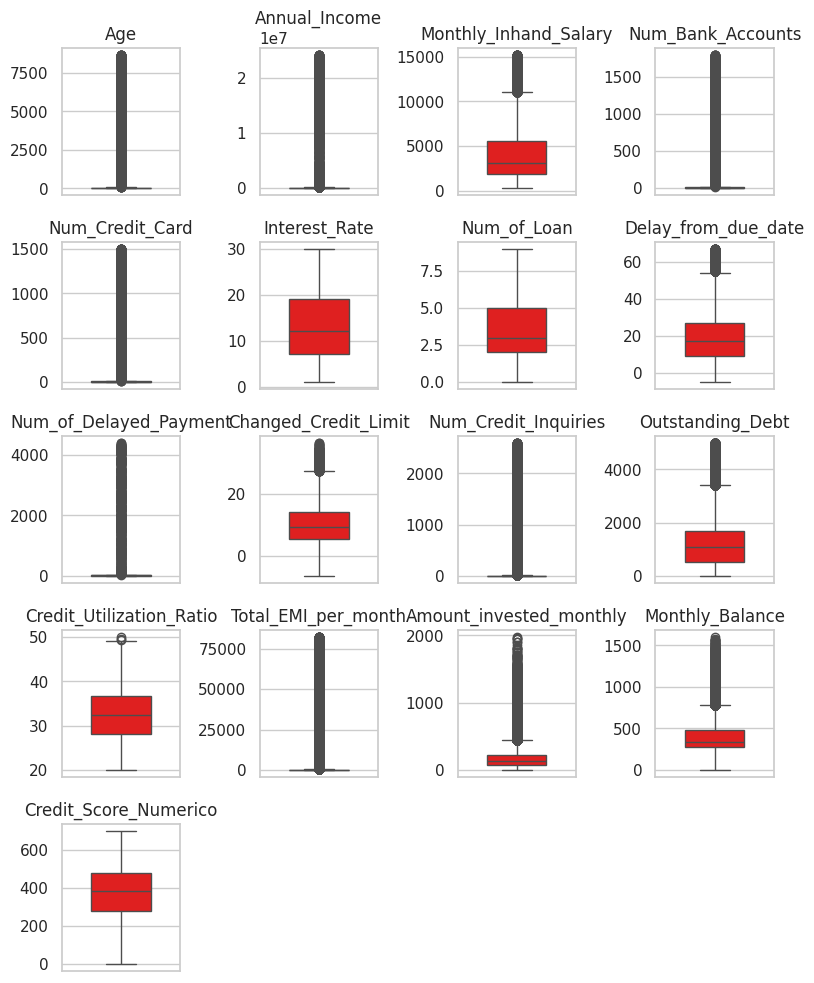

In [26]:
## criando vários boxplots

sns.set(style="whitegrid")

# Calculando o númere de colunas.
num_cols = len(dados_numericos.columns)

# Calculando o número de linhas necessárias para exibir todos os boxplots
num_rows = (num_cols + 3) // 4  # Arredondando para cima

# Configurando os boxplots
fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(8, 2 * num_rows))
axes = axes.flatten()

# Iterando e criandos os boxplots
for i, col in enumerate(dados_numericos.columns):
    sns.boxplot(y=dados_numericos[col], ax=axes[i], width=0.5, color='red')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')


for i in range(num_cols, len(axes)):
    axes[i].axis('off')

# Ajustando o layout
plt.tight_layout()
plt.show()

# Análise Descritiva com Dados Limpos.

#Correlação

Agora vamos analisar as relações entre as variáveis, e principalmente a influência de cada uma na variável Score.

In [27]:
dados_numericos.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score_Numerico
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,696
1,23.0,19114.12,3081.977500,3,4,3,4.0,-1,14.0,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629163,633
2,33.0,19114.12,3081.977500,3,4,3,4.0,3,7.0,9.39,4.0,809.98,28.609352,49.574949,81.699521,331.209863,591
3,23.0,19114.12,3081.977500,3,4,3,4.0,5,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,560
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,14.0,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,667


Text(0.5, 1.0, 'Análise de Correlação')

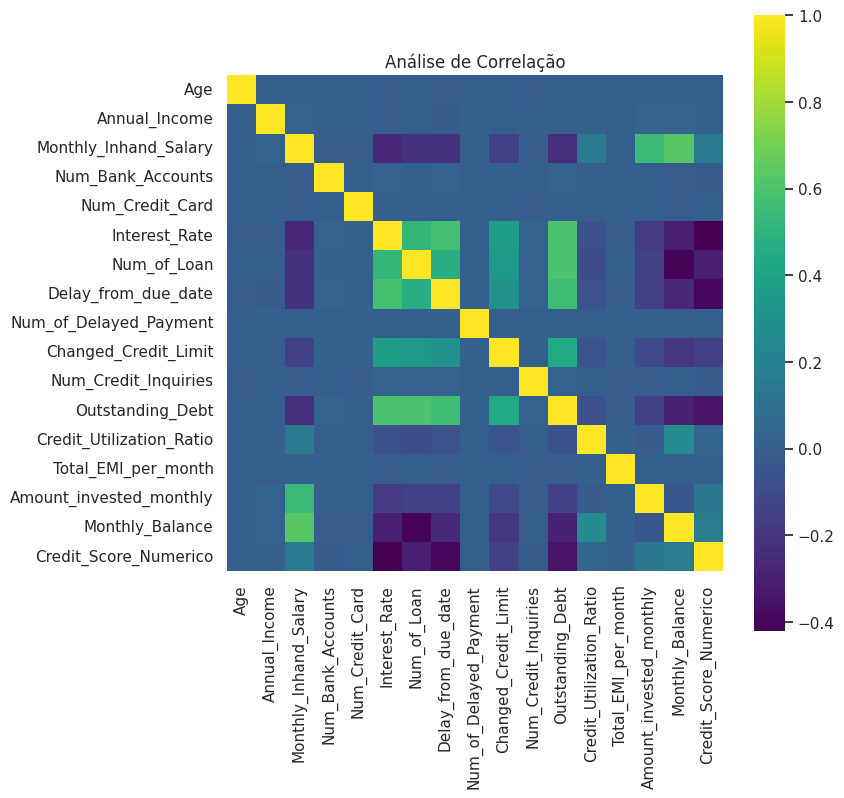

In [28]:
## Grafico de correlação de Pearson das variaveis númericas.

correlation = dados_numericos.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, vmax=1, square=True,annot=False,cmap='viridis')

plt.title('Análise de Correlação')

Vamos avaliar se existe alguma diferença significativa entre as médias do grupo Credit_Score

In [29]:
from scipy import stats

# Criar um dicionário para armazenar os resultados
anova_results = {}

# Aplicar ANOVA para cada variável numérica
for coluna in dados_numericos.columns:
    # Separar os grupos pela variável categórica Credit_Score
    grupos = [dados_numericos[dados_sem_outliers['Credit_Score'] == score][coluna] for score in dados_sem_outliers['Credit_Score'].unique()]

    # Aplicar ANOVA
    f_val, p_val = stats.f_oneway(*grupos)

    # Armazenar o resultado
    anova_results[coluna] = p_val

# Exibir os resultados
anova_results


{'Age': 0.49860872209518403,
 'Annual_Income': 0.06527720313555185,
 'Monthly_Inhand_Salary': 0.0,
 'Num_Bank_Accounts': 0.006630413717874654,
 'Num_Credit_Card': 0.7225790531457734,
 'Interest_Rate': 0.0,
 'Num_of_Loan': 0.0,
 'Delay_from_due_date': 0.0,
 'Num_of_Delayed_Payment': 0.09830136662425057,
 'Changed_Credit_Limit': 0.0,
 'Num_Credit_Inquiries': 0.006073047884275682,
 'Outstanding_Debt': 0.0,
 'Credit_Utilization_Ratio': 1.8222985001461817e-26,
 'Total_EMI_per_month': 0.1749485672971544,
 'Amount_invested_monthly': 0.0,
 'Monthly_Balance': 0.0,
 'Credit_Score_Numerico': 0.0}

## Fortes Indicadores

As variáveis como **Annual_Income, Monthly_Inhand_Salary**, e várias características relacionadas a empréstimos e uso de crédito são fortes indicadores do Credit_Score.

In [30]:
from scipy.stats import chi2_contingency

# Criar um dicionário para armazenar os resultados
chi2_results = {}

# Aplicar o teste Qui-quadrado para cada variável categórica
for coluna in dados_categoricos.columns:
    # Criar a tabela de contingência
    tabela_contingencia = pd.crosstab(dados_sem_outliers[coluna], dados_sem_outliers['Credit_Score'])

    # Aplicar o teste de Qui-quadrado
    chi2, p_val, dof, expected = chi2_contingency(tabela_contingencia)

    # Armazenar o resultado
    chi2_results[coluna] = p_val

# Exibir os resultados
chi2_results


{'Occupation': 4.431047034504671e-18,
 'Type_of_Loan': 0.0,
 'Credit_Mix': 0.0,
 'Payment_of_Min_Amount': 0.0,
 'Payment_Behaviour': 1.275820548317674e-206,
 'Month_Num': 2.7898828954830215e-31,
 'Credit_History_Age_Months': 0.0,
 'Credit_Score': 0.0}

**Todas as variáveis categóricas apresentaram p-valores muito baixos, indicando que são todas altamente significativas em relação à variável Credit_Score.**

Fortes Indicadores: Variáveis como **Occupation, Type_of_Loan, Credit_Mix, Payment_of_Min_Amount, Payment_Behaviour, Month_Num e Credit_History_Age_Months** são todos indicadores importantes que afetam as classificações de crédito.


#Transformando Variáveis Categoricas Para Aplicação de ML

In [31]:
dados_categoricos_transformados = dados_sem_outliers.copy()

In [32]:
# Criar o LabelEncoder
le = LabelEncoder()

# Ajustar e transformar a coluna 'Payment_Behaviour'
dados_categoricos_transformados['Payment_Behaviour_Numerica'] = le.fit_transform(dados_categoricos_transformados['Payment_Behaviour'])

# Visualizar os resultados
print(dados_categoricos_transformados[['Payment_Behaviour', 'Payment_Behaviour_Numerica']])

                      Payment_Behaviour  Payment_Behaviour_Numerica
0       High_spent_Small_value_payments                           3
1        Low_spent_Large_value_payments                           4
2       Low_spent_Medium_value_payments                           5
3        Low_spent_Small_value_payments                           6
4      High_spent_Medium_value_payments                           2
...                                 ...                         ...
83138  High_spent_Medium_value_payments                           2
83139   High_spent_Large_value_payments                           1
83140  High_spent_Medium_value_payments                           2
83142    Low_spent_Large_value_payments                           4
83143                            !@9#%8                           0

[73089 rows x 2 columns]


In [33]:
# Substituir '_______' por NaN
dados_categoricos_transformados['Occupation'].replace('_______', pd.NA, inplace=True)

# Removendo linhas com NaN
dados_categoricos_transformados.dropna(subset=['Occupation'], inplace=True)

# Verificar os valores únicos na coluna 'Occupation'
print(dados_categoricos_transformados['Occupation'].unique())

['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Accountant' 'Musician' 'Writer'
 'Architect' 'Manager' 'Mechanic']


<ipython-input-33-7a12a4678b8f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados_categoricos_transformados['Occupation'].replace('_______', pd.NA, inplace=True)


In [34]:
# Definir a ordem das categorias
ordem_credit_mix = ['Bad', 'Standard', 'Good', 'Unknown']

# Criar o OrdinalEncoder
oe = OrdinalEncoder(categories=[ordem_credit_mix])

# Ajustar e transformar a coluna 'Credit_Mix'
dados_categoricos_transformados['Credit_Mix_Numerica'] = oe.fit_transform(dados_categoricos_transformados[['Credit_Mix']])

# Visualizar os resultados
print(dados_categoricos_transformados[['Credit_Mix', 'Credit_Mix_Numerica']])

      Credit_Mix  Credit_Mix_Numerica
0        Unknown                  3.0
1           Good                  2.0
2           Good                  2.0
3           Good                  2.0
4           Good                  2.0
...          ...                  ...
83138    Unknown                  3.0
83139    Unknown                  3.0
83140    Unknown                  3.0
83142       Good                  2.0
83143       Good                  2.0

[67993 rows x 2 columns]


In [35]:
# Usar pd.get_dummies para codificação one-hot
dados_categoricos_transformados = pd.get_dummies(dados_categoricos_transformados, columns=['Occupation'], prefix='Occupation')

In [36]:
# Usar pd.get_dummies para codificação one-hot
dados_categoricos_transformados = pd.get_dummies(dados_categoricos_transformados, columns=['Payment_of_Min_Amount'], prefix='Payment_Min_Amount')

In [37]:
# Separar os tipos de empréstimos e criar variáveis dummy
# Remove "and Not Specified" para padronização
dados_categoricos_transformados['Type_of_Loan'] = dados_categoricos_transformados['Type_of_Loan'].str.replace(' and Not Specified', '')
dados_categoricos_transformados['Type_of_Loan'] = dados_categoricos_transformados['Type_of_Loan'].str.split(', ')

# Usar pd.get_dummies com a explosão dos tipos de empréstimos
type_of_loan_exploded = dados_categoricos_transformados.explode('Type_of_Loan')
type_of_loan_dummies = pd.get_dummies(type_of_loan_exploded['Type_of_Loan'], prefix='Loan_Type')

# Agrupar de volta os dados originais
dados_categoricos_transformados = dados_categoricos_transformados.join(type_of_loan_dummies.groupby(type_of_loan_exploded.index).sum())

dados_categoricos_transformados = dados_categoricos_transformados.drop(['Type_of_Loan'], axis=1)
dados_categoricos_transformados = dados_categoricos_transformados.drop(['Payment_Behaviour'], axis=1)
dados_categoricos_transformados = dados_categoricos_transformados.drop(['Credit_Mix'], axis=1)
dados_categoricos_transformados = dados_categoricos_transformados.drop(['Credit_Score'], axis=1)



In [38]:
dados_categoricos_transformados.shape

(67993, 66)

In [39]:
dados_categoricos_transformados.head()

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Month_Num,Credit_History_Age_Months,Credit_Score_Numerico,Payment_Behaviour_Numerica,Credit_Mix_Numerica,Occupation_Accountant,Occupation_Architect,Occupation_Developer,Occupation_Doctor,Occupation_Engineer,Occupation_Entrepreneur,Occupation_Journalist,Occupation_Lawyer,Occupation_Manager,Occupation_Mechanic,Occupation_Media_Manager,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_Min_Amount_NM,Payment_Min_Amount_No,Payment_Min_Amount_Yes,Loan_Type_Auto Loan,"Loan_Type_Auto Loan,",Loan_Type_Credit-Builder Loan,"Loan_Type_Credit-Builder Loan,",Loan_Type_Debt Consolidation Loan,"Loan_Type_Debt Consolidation Loan,",Loan_Type_Home Equity Loan,"Loan_Type_Home Equity Loan,",Loan_Type_Mortgage Loan,"Loan_Type_Mortgage Loan,",Loan_Type_Not Specified,"Loan_Type_Not Specified,",Loan_Type_Não informado,Loan_Type_Payday Loan,"Loan_Type_Payday Loan,",Loan_Type_Personal Loan,"Loan_Type_Personal Loan,",Loan_Type_Student Loan,"Loan_Type_Student Loan,",Loan_Type_and Auto Loan,Loan_Type_and Credit-Builder Loan,Loan_Type_and Debt Consolidation Loan,Loan_Type_and Home Equity Loan,Loan_Type_and Mortgage Loan,Loan_Type_and Payday Loan,Loan_Type_and Personal Loan,Loan_Type_and Student Loan
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089,1,22.0,696,3,3.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,23.0,19114.12,3081.977500,3,4,3,4.0,-1,14.0,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629163,2,NaN,633,4,2.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,33.0,19114.12,3081.977500,3,4,3,4.0,3,7.0,9.39,4.0,809.98,28.609352,49.574949,81.699521,331.209863,3,22.0,591,5,2.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,23.0,19114.12,3081.977500,3,4,3,4.0,5,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310,4,22.0,560,6,2.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,14.0,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231,5,22.0,667,2,2.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


# Algoritmos

Vamos separar o DataFrame em treino e teste e aplicar em diferentes modelos e algoritmos, analisando os resultados e as devidas métricas.

###Separando Treino e Teste



In [40]:
X = dados_categoricos_transformados.drop(['Credit_Score_Numerico'], axis=1)
y = dados_categoricos_transformados['Credit_Score_Numerico']

split_test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=4)

# Criando Imputer para casos de NaN
imputer = SimpleImputer(strategy='mean')

In [41]:
print("{0:0.2f}% está em treino".format((len(X_train)/len(dados_categoricos_transformados.index)) * 100))
print("{0:0.2f}% está em teste".format((len(X_test)/len(dados_categoricos_transformados.index)) * 100))

70.00% está em treino
30.00% está em teste


#Regressão Linear

In [42]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

print('R2 score: %.2f' % r2_score(y_test, y_pred))
print('MSE: %.2f' % metrics.mean_squared_error(y_test, y_pred))
print('RMSE: %.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score: 0.23
MSE: 21272.21
RMSE: 145.85


### Conclusão do uso de Regressão linear:
O resultado obtido para R2 mostra que o modelos tem uma capacidade limitada de predição, sugerindo que não há uma captura adequada dos padrões dos dados, conseguindo explicar apenas 23% das variações dos dados.
O mesmo acontece com o resultado do RMSE que sinaliza o erro médio da previsão do modelo em relação a valores reais. Ele indica o quão longe nosso modelo está de valores reais.
Um MSE de 212272.21 sugere que, em média, o erro das previsões do modelo é relativamente grand, uma vez que ele representa a média dos erros quadraticos entre as previsões do modelo em valores reais.

Em resumo, este modelo de Regressão Linear ainda não está confiavel, faremos a avaliação da performance do modelo Randon Forest.

##Random Forest

In [44]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=50, random_state=4)

# Treinar o modelo
rf_model.fit(X_train, y_train)

# Fazer previsões
rf_y_pred = rf_model.predict(X_test)

# Avaliar o modelo
rf_r2 = r2_score(y_test, rf_y_pred)
rf_rmse = np.sqrt(metrics.mean_squared_error(y_test, rf_y_pred))

print(f'R² score (Random Forest): {rf_r2:.2f}')
print(f'RMSE (Random Forest): {rf_rmse:.2f}')
print('MSE: %.2f' % metrics.mean_squared_error(y_test, rf_y_pred))

R² score (Random Forest): 0.47
RMSE (Random Forest): 121.14
MSE: 14675.37


### Conclusão do uso do modelo Random Forest:
Em comparação com o modelo de Regressão Linear o Random Forest demonstrou um desempenho melhorado, saindo de 23% de previsões para 47% e com RMSE menor, indicando que esse modelo é mais eficaz para o problema de regressão apresentando do que o modelo de regressão linear.

# Previsão

Para a etapa de prever/inferir faremos a combinação de alguns modelos, seguindo com a mensuração de suas assertividades tanto para treino e teste.

Definindo os modelos que vamos usar:
* **Regressão Linear:** Modelo que relaciona variáveis independentes a uma dependente através de uma linha reta.
* **Random Forest:** Conjunto de árvores de decisão que melhora a precisão por votação.
* **XGBoost:** Algoritmo de boosting que otimiza a função de perda em árvores sequenciais.
* **Gradient Boosting:** Combina modelos fracos em um forte, ajustando previsões sequencialmente.

Separamos em 2 estapas para melhor acompanhamento

Preparando a base novamente:

In [45]:
# Separar X e y
X = dados_categoricos_transformados.drop(['Credit_Score_Numerico'], axis=1)
y = dados_categoricos_transformados['Credit_Score_Numerico']

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Separação dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4)

# Identificar colunas categóricas e numéricas
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(exclude=['object']).columns.tolist()

# Criar um pré-processador para transformar os dados
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

print("{0:0.2f}% está em treino".format((len(X_train)/len(dados_categoricos_transformados.index)) * 100))
print("{0:0.2f}% está em teste".format((len(X_test)/len(dados_categoricos_transformados.index)) * 100))

70.00% está em treino
30.00% está em teste


### Etapa 1 - 2 modelos

Definindo os modelos:

In [46]:
# Criar dicionário de modelos
models = {
    'Linear Regression': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('model', LinearRegression())]),
    'Random Forest': Pipeline(steps=[('preprocessor', preprocessor),
                                      ('model', RandomForestRegressor(random_state=4))])
}

Executando os modelos etapa 1:

In [47]:
results = {}

# Treinar e avaliar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)

    # Previsões
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Avaliação
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    rse_train = np.sqrt(np.sum((y_train - y_train_pred)**2) / (len(y_train) - X_train.shape[1]))
    rse_test = np.sqrt(np.sum((y_test - y_test_pred)**2) / (len(y_test) - X_test.shape[1]))

    # Armazenar resultados
    results[name] = {
        'R² Treino': r2_train,
        'RMSE Treino': rmse_train,
        'RSE Treino': rse_train,
        'R² Teste': r2_test,
        'RMSE Teste': rmse_test,
        'RSE Teste': rse_test
    }

# Exibir resultados
results_df = pd.DataFrame(results).T
print(results_df)

                   R² Treino  RMSE Treino  RSE Treino  R² Teste  RMSE Teste  \
Linear Regression   0.237816   145.629677  145.729222  0.234454  145.849948   
Random Forest       0.928131    44.718979   44.749546  0.477970  120.439370   

                    RSE Teste  
Linear Regression  146.082887  
Random Forest      120.631726  


### Etapa 2: + 2 Modelos

Definindo os modelos:

In [48]:
# Adicionar novos modelos ao dicionário
models.update({
    'XGBoost': Pipeline(steps=[('preprocessor', preprocessor),
                                ('model', XGBRegressor(random_state=4))]),
    'Gradient Boosting': Pipeline(steps=[('preprocessor', preprocessor),
                                         ('model', GradientBoostingRegressor())])
})

Executando modelos etapa 2:

In [49]:
results = {}

# Treinar e avaliar cada modelo
for name, model in models.items():
    # Treinamento
    model.fit(X_train, y_train)

    # Previsões
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Avaliação
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

    rse_test = np.sqrt(np.sum((y_test - y_test_pred)**2) / (len(y_test) - X_test.shape[1]))
    rse_train = np.sqrt(np.sum((y_train - y_train_pred)**2) / (len(y_train) - X_train.shape[1]))

    # Armazenar resultados
    results[name] = {
        'R² Treino': r2_train,
        'RMSE Treino': rmse_train,
        'RSE Treino': rse_train,
        'R² Teste': r2_test,
        'RMSE Teste': rmse_test,
        'RSE Teste': rse_test
    }

# Exibir resultados
results_df = pd.DataFrame(results).T
print(results_df)

                   R² Treino  RMSE Treino  RSE Treino  R² Teste  RMSE Teste  \
Linear Regression   0.237816   145.629677  145.729222  0.234454  145.849948   
Random Forest       0.928131    44.718979   44.749546  0.477970  120.439370   
XGBoost             0.601454   105.307522  105.379505  0.417792  127.191949   
Gradient Boosting   0.353341   134.139781  134.231472  0.337780  135.650610   

                    RSE Teste  
Linear Regression  146.082887  
Random Forest      120.631726  
XGBoost            127.395089  
Gradient Boosting  135.867259  


### Avaliação de Performance dos Modelos
* Regressão Linear: O modelo de Regressão Linear tem baixa capacidade preditiva e apresenta erros elevados, com desempenho bastante similar nos dados de treino e teste.

* Random Forest: O modelo Random Forest parece estar overfitting nos dados de treino, apresentando uma diferença considerável de performance entre treino e teste. Apesar disso, ainda oferece uma melhoria significativa sobre a regressão linear.

* O XGBoost tem um bom equilíbrio entre treino e teste, com menor risco de overfitting e melhor generalização do que o Random Forest, embora não alcance o mesmo nível de explicação dos dados de treino.

* O Gradient Boosting tem um desempenho estável, com pouca diferença entre os resultados de treino e teste, mas o nível de explicação dos dados é modesto, semelhante à regressão linear.